# 1 逻辑回归

在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。
设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。

## 1.1 数据可视化

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'E:\机器学习(吴恩达)\ML数据\ml_ex2\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


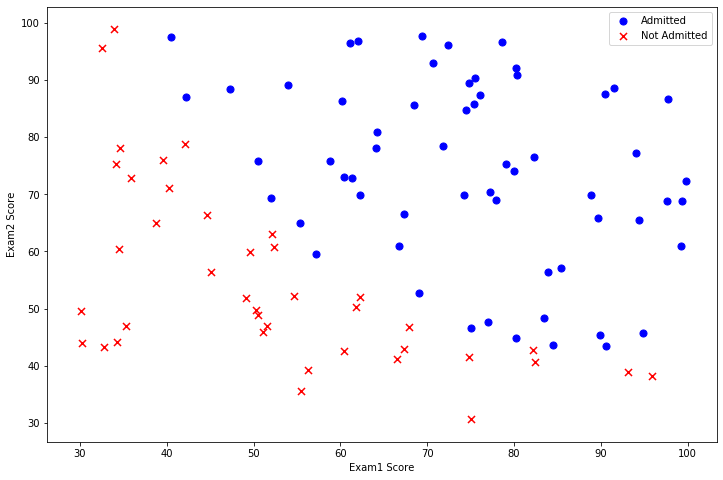

In [15]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## 1.2 实现

## 1.2.1 sigmoid 函数

In [16]:
#实现sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 1.2.2 代价函数和梯度

In [17]:
# 实现代价函数
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

#初始化X，y

data.insert(0, 'Ones', 1) #加一列常数列

#初始化X，y，$\theta$
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)

#转换X y的类型
X = np.matrix(X.values)
y = np.matrix(y.values)

#检查矩阵的维度
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [18]:
#用初始计算代价
cost(theta , X, y)

0.6931471805599453

In [19]:
# 实现阶梯计算的函数（没有更新theta）
def  gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad  

### 1.2.3 用工具库计算theta的值

In [20]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [21]:
# 用theta的计算结果代回代价函数计算

cost(result[0], X, y)

0.20349770158947425

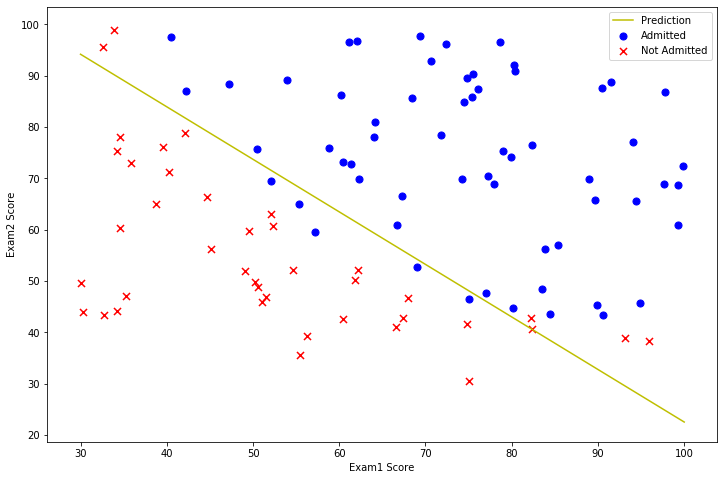

In [25]:
# 画出决策曲线

plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

### 1.2.4 评价逻辑回归模型

在确定参数之后，我们可以使用这个模型来预测学社是否录取。
if Exam1=45  Exam2=85  so 录取率=0.776

In [26]:
# 实现 h theta
def hfunc1(theta, X):
    return sigmoid(np.dot(theta.T, X))
hfunc1(result[0], [1, 45, 85])

0.776290625526598

另一种评价theta的方法是看训练集上的正确率怎样。
写一个predict的函数，给出数据以及参数，会返回 1 / 0
然后把这个predict幻术用于训练集上，看准确率怎样

In [ ]:
# 定义预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

# 统计准确率
theta_min = np.matrix(result[0])

